In [1]:
import numpy as np
import pandas as pd
import math
from pandas import Series,DataFrame

import warnings
import sklearn.tree
import sklearn.metrics

from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
sns.set(style="white", color_codes=True)
%matplotlib inline
plt.style.use('seaborn') # pretty matplotlib plots

In [2]:
Glassdoor_data = pd.read_csv('All_Glassdoor_final.csv')
Glassdoor_data

,Unnamed: 0,Company,Position,Location,Salary Average
0,0,Accenture,Accenture Entry Level Technology Associate,"Atlanta, GA",46.0
1,1,Accenture,Accenture Flex - Content Review,"Austin, TX",44.5
2,2,Accenture,Management Consulting Manager (Multiple Positi...,"Charlotte, NC",118.0
3,3,Accenture,Federal - Program Manager - Senior,"Chantilly, VA",145.5
4,4,Accenture,Product Specialist Support Analyst,"San Jose, CA",54.5
...,...,...,...,...,...
9536,9536,Workday,Senior Software Engineer,"Pleasanton, CA",137.5
9537,9537,Workday,"Director, Business Technology","Pleasanton, CA",145.5
9538,9538,Workday,"Senior Automation Engineer, Database","Palo Alto, CA",122.0
9539,9539,Yelp,Global Benefits Manager,"Phoenix, AZ",72.5


In [3]:
avg_salary = Glassdoor_data[['Company','Salary Average']].groupby('Company',as_index = False)['Salary Average'].mean()
position = Glassdoor_data[['Position']]
#print(position)
#avg_salary = company_title.groupby('Company',as_index = False)['Salary Average'].mean()
#avg_salary = pd.DataFrame(data = avg_salary)

In [4]:
#avg_salary.to_csv('GlassdoorData_avgsalary.csv',encoding='gbk')
avg_salary = pd.read_csv('GlassdoorData_avgsalary.csv')
avg_salary

,Company,Salary Average
0,Amazon,27.147768
1,Apple,124.439677
2,Microsoft,131.384173
3,JPMorgan Chase,89.007389
4,Walmart,44.553892
5,Google,134.465517
6,Facebook,131.277381
7,Vmware,127.453659
8,Tesla,84.740099
9,PayPal,122.122059


In [5]:
company_title = Glassdoor_data[['Company']]
NumOfCompany = company_title.apply(pd.value_counts)

## Visualize of each company and number of employers

In [6]:
NumOfCompany

,Company
Amazon,829
Apple,804
Microsoft,695
JPMorgan Chase,609
Walmart,501
Google,464
Facebook,420
Vmware,410
Tesla,404
PayPal,340


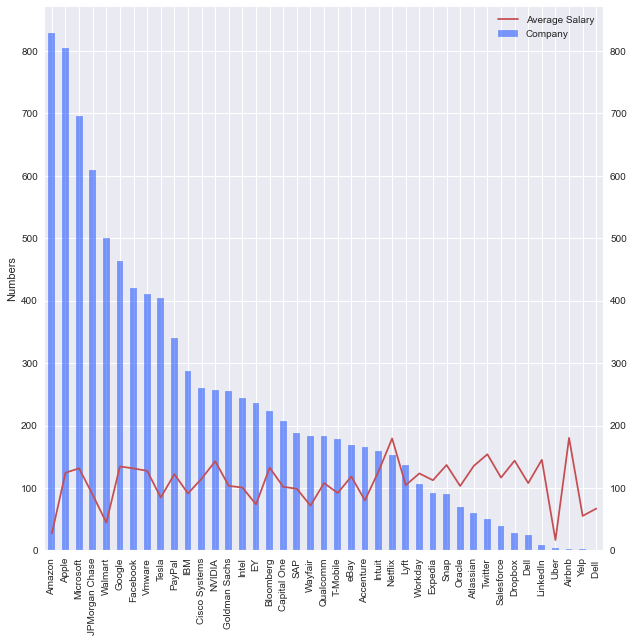

In [7]:
plt.rcParams['figure.figsize'] = (10, 10)
sns.set_palette(sns.color_palette('bright'))  #color
NumOfCompany.plot.bar(stacked=False, alpha=0.5)
plt.ylabel('Numbers')
plt.plot(avg_salary['Company'],avg_salary['Salary Average'], color='r',label = 'Average Salary')
plt.tick_params(axis='y', which='both', labelleft='off', labelright='on')
plt.legend()
plt.show()

In [8]:
result = position.apply(pd.value_counts)
print(result)

                                                    Position
Senior Software Engineer                                  21
Site Reliability Engineer                                 17
Product Manager                                           16
Senior Software Development Engineer                      14
Software Engineer                                         13
...                                                      ...
Multimedia HW/Systems Power Engineer                       1
Senior Financial Analyst, Logistics Network Design         1
Senior Software Engineer - Web Shared Services             1
Cloud Data Infra Engineer                                  1
Senior Product Manager, CPC                                1

[7308 rows x 1 columns]


In [9]:
location = Glassdoor_data[['Location']]
NumOfLocation = location.apply(pd.value_counts)
NumOfLocation

,Location
"Santa Clara, CA",859
"New York, NY",510
"San Jose, CA",426
"Palo Alto, CA",420
"Redmond, WA",412
...,...
"Euclid, OH",1
"Wagoner, OK",1
"Livonia, MI",1
"Bedford, MA",1


In [10]:
Amazon =  Glassdoor_data.loc[Glassdoor_data['Company']=='Amazon']
Amazon

,Unnamed: 0,Company,Position,Location,Salary Average
168,168,Amazon,Warehouse Team Member,"O'Fallon, MO",12.0
169,169,Amazon,Amazon Order Filler - Early Morning Shifts Ava...,"Dedham, MA",13.5
170,170,Amazon,Warehouse/Shopper Team Member,"Browns Mills, NJ",12.0
171,171,Amazon,Amazon Warehouse Associate,"West Barnstable, MA",13.5
172,172,Amazon,Amazon Team Member,"North Reading, MA",13.5
...,...,...,...,...,...
992,992,Amazon,Warehouse Laborer,"Tacoma, WA",21.5
993,993,Amazon,Warehouse Worker - Immediate Opening,"Maple Valley, WA",14.0
994,994,Amazon,Amazon Warehousing Associate - Earn up to $20....,"Los Gatos, CA",14.0
995,995,Amazon,Software Dev Engineer II,"Seattle, WA",100.5


## Number of data for each location

In [11]:
ama_location = Amazon[['Location']]
ama_location = ama_location.apply(pd.value_counts)
ama_location.head(50)

,Location
"Tacoma, WA",61
"Seattle, WA",38
"Lakebay, WA",27
"Minneapolis, MN",20
"Ravensdale, WA",18
"Bonney Lake, WA",18
"Herndon, VA",16
"Carteret, NJ",14
"Saint Paul, MN",14
"Pacific, WA",13


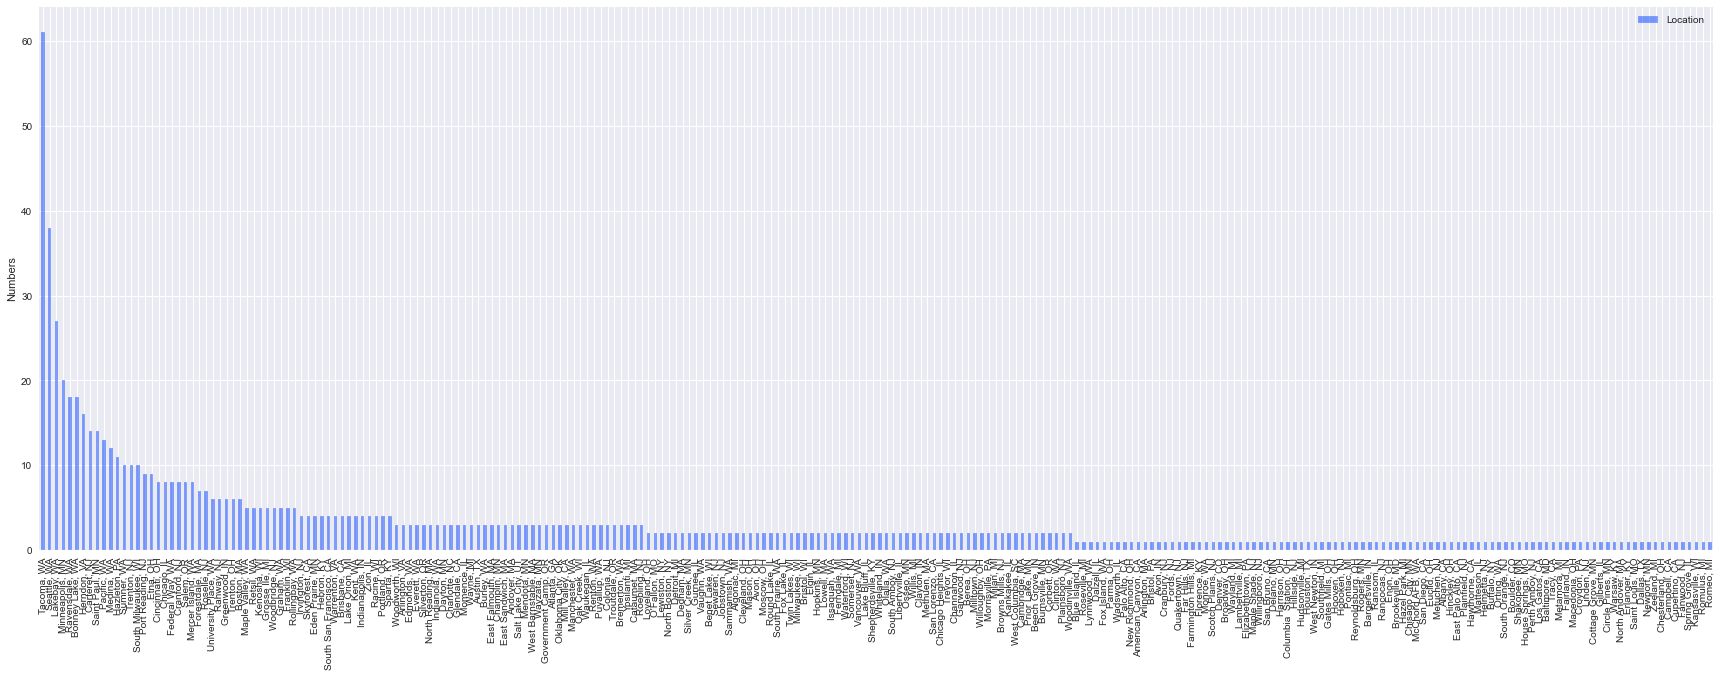

In [12]:
plt.rcParams['figure.figsize'] = (30, 10)
sns.set_palette(sns.color_palette('bright'))  #color
ama_location.plot.bar(stacked=False, alpha=0.5)
plt.ylabel('Numbers')
plt.legend()
plt.show()

## Natural language pre-process 

In [13]:
ama_data = Amazon.copy()
ama_data.drop(['Unnamed: 0','Company'],axis = 1,inplace=True)

In [14]:
ama_data_arr = np.array(ama_data)
ama_data_arr[:,0]

array(['Warehouse Team Member',
       'Amazon Order Filler - Early Morning Shifts Available',
       'Warehouse/Shopper Team Member', 'Amazon Warehouse Associate',
       'Amazon Team Member', 'Amazon Order Picker',
       'Amazon Picker/Packer - Full Time', 'Amazon Warehouse Worker',
       'Shift Assistant,Operations', 'Amazon Picker/Packer',
       'Warehouse Associate - Full Time',
       'Amazon Order Filler - Immediate Hire',
       'Amazon Order Picker/Packer - FT with benefits',
       'Operations Engineer',
       'Amazon Order Picker/Packer - Immediate Hire, PT - Flexible',
       'Sr. Technical Program Manager', 'Manager Software Development',
       'Amazon Warehouse Associate - Full-time',
       'Amazon Warehouse Worker - FT', 'Sr. Quantum Research Scientist',
       'Amazon Warehouse Attendant (Immediate Openings) - Earn $15/hr or More',
       'Warehouse Team Member (Day and Night Shifts Available)',
       'Amazon Warehouse Worker - Immediate Hire',
       'Amazon War

In [15]:
import re
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
stop = set(stopwords.words('english')) 
#print(stop)
#stemming
from nltk.stem import PorterStemmer
#lemmatization
from nltk.stem import WordNetLemmatizer 
wnl = WordNetLemmatizer()
from nltk import word_tokenize, pos_tag
from nltk.corpus import wordnet

In [16]:
filtered_amazondata = []
for text in ama_data_arr[:,0]:
    text = text.lower()
    text_cl = re.sub('[^a-zA-Z]', ' ', text)
    #text_tk = nltk.word_tokenize(text_cl)
    #text_sw = [w for w in text_tk if w not in stopwords.words('english')]
    text = text_cl
    print(text)
    filtered_amazondata.append(text)

warehouse team member
amazon order filler   early morning shifts available
warehouse shopper team member
amazon warehouse associate
amazon team member
amazon order picker
amazon picker packer   full time
amazon warehouse worker
shift assistant operations
amazon picker packer
warehouse associate   full time
amazon order filler   immediate hire
amazon order picker packer   ft with benefits
operations engineer
amazon order picker packer   immediate hire  pt   flexible
sr  technical program manager
manager software development
amazon warehouse associate   full time
amazon warehouse worker   ft
sr  quantum research scientist
amazon warehouse attendant  immediate openings    earn     hr or more
warehouse team member  day and night shifts available 
amazon warehouse worker   immediate hire
amazon warehouse worker   earn up to     hr
aws solutions architect   north carolina
amazon team member
amazon warehouse associate
amazon order picker
amazon warehouse worker
amazon picker packer   full tim

In [17]:
import re
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
stop = set(stopwords.words('english')) 
#print(stop)
#stemming
from nltk.stem import PorterStemmer
#lemmatization
from nltk.stem import WordNetLemmatizer 
wnl = WordNetLemmatizer()
from nltk import word_tokenize, pos_tag
from nltk.corpus import wordnet

In [18]:
def data_clean(data):
    filter_text_list = list()
    for text in data:
        text = text.lower()
        text_cl = re.sub(r'[^a-zA-Z]', ' ', text) 
        #tokenize
        text_tk = nltk.word_tokenize(text_cl)
        text_sw = [w for w in text_tk if w not in stopwords.words('english')]
        filter_text = text_sw
        #print(filter_text)
        filter_text_list.append( filter_text)
    return filter_text_list

In [19]:
def count_words(s, n): 
    s_list =  data_clean(s)
    
    top_n_dict = {}
    for text in s_list:
        for word in text:
            if word in top_n_dict:
                top_n_dict[word] += 1
            else:
                top_n_dict[word] = 1
 
    word_frequency = []
    vocal_list = []
    values = sorted(list(set(top_n_dict.values())), reverse=True)  # 统计所有单词出现的频次情况，将频次降序放入列表
    for w in values:
        word_list = []
        vocabulary = []
        for k, v in top_n_dict.items():
            if v == w:
                word_list.append((k, v))
                vocabulary.append(k)
        word_frequency.extend(sorted(word_list))
        vocal_list.extend(sorted(vocabulary))
        
    return word_frequency[:n], vocal_list[:n]

In [20]:
V_1, vocal_1 = count_words(ama_data_arr[:,0], 500)
V_2, vocal_2 = count_words(ama_data_arr[:,1], 500)

In [21]:
filtered_amazondata

['warehouse team member',
 'amazon order filler   early morning shifts available',
 'warehouse shopper team member',
 'amazon warehouse associate',
 'amazon team member',
 'amazon order picker',
 'amazon picker packer   full time',
 'amazon warehouse worker',
 'shift assistant operations',
 'amazon picker packer',
 'warehouse associate   full time',
 'amazon order filler   immediate hire',
 'amazon order picker packer   ft with benefits',
 'operations engineer',
 'amazon order picker packer   immediate hire  pt   flexible',
 'sr  technical program manager',
 'manager software development',
 'amazon warehouse associate   full time',
 'amazon warehouse worker   ft',
 'sr  quantum research scientist',
 'amazon warehouse attendant  immediate openings    earn     hr or more',
 'warehouse team member  day and night shifts available ',
 'amazon warehouse worker   immediate hire',
 'amazon warehouse worker   earn up to     hr',
 'aws solutions architect   north carolina',
 'amazon team member'

In [22]:
np.shape(ama_data_arr[:,1])

(829,)

## Labelize of each location

In [23]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
encoder=LabelEncoder()
location_new=encoder.fit_transform(ama_data_arr[:,1])
location_new

array([155,  56,  25, 233, 154,  60, 212,  62, 157,  80, 218,  17,   3,
       226,  38,  99, 198,  80,  97,  87, 243, 183,  32, 204,  35, 154,
       233,  60,  62, 212, 157,  80, 218,  17,   3, 226,  38, 198,  99,
        80,  97, 243,  87, 183,  32, 204,  35, 155,  56,  25, 233, 154,
        60, 212,  62, 157,  80,  17, 218,   3, 226,  38,  99, 198,  97,
        80, 243,  87, 183,  32, 204,  35, 145, 212, 231, 198, 119, 169,
       203, 153,  78, 149, 217, 217,  98,  17, 132,   7,  38, 171, 186,
       215, 215,  34, 177,   6, 192, 148, 205,  49, 195,  19,   6,  37,
        31, 189, 119, 209, 134, 147, 133,  26,  74,  71, 215, 215,  68,
        15,  84, 168, 213, 171, 139, 178, 190, 176, 103, 218,  17, 215,
        51,  40,  38, 139, 152,   4, 217, 112, 209, 130, 175,  21, 198,
       215, 135, 215, 215, 183, 215, 146,  54,  67, 215, 159, 217, 158,
       240, 226,  86, 215, 191, 119, 215,  52, 177,  81, 222, 150,  61,
       177, 215,  64, 229, 119, 192,  53, 191,  99,  58, 215, 22

In [24]:
onehot = OneHotEncoder()
location_1hot=onehot.fit_transform(location_new.reshape(-1,1))
location_1hot = location_1hot.toarray()
location_1hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
np.shape(location_1hot)

(829, 246)

In [26]:
title_new=encoder.fit_transform(filtered_amazondata)
title_1hot=onehot.fit_transform(title_new.reshape(-1,1))
title_1hot = title_1hot.toarray()
title_1hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [27]:
np.shape(title_1hot)

(829, 483)

## Binarize output-- average salary for each location
### Set upper and lower limitation for 'normal' salary

In [44]:
#location_money = df.loc[df['TITLE']=='SOFTWARE ENGINEER']
location_money = Glassdoor_data.groupby('Location',as_index = False)['Salary Average'].mean()
#location_money
avg_salary_location = np.array(location_money)
print(np.shape(avg_salary_location))
upper_bound = avg_salary_location[:,1].T * 2.00
lower_bound = avg_salary_location[:,1].T * 0.50
bounds = np.vstack((upper_bound, lower_bound)).T
salary_location = np.hstack((avg_salary_location,bounds))
salary_location = pd.DataFrame(data = salary_location, columns=['location','average_eachlocation','upper','lower'])
salary_location

(691, 2)


,location,average_eachlocation,upper,lower
0,"Addison, TX",141.7,283.4,70.85
1,"Alabaster, AL",40,80,20
2,"Alachua, FL",67.5,135,33.75
3,"Albany, CA",14.5,29,7.25
4,"Albany, NY",64.5,129,32.25
...,...,...,...,...
686,"Yakima, WA",30,60,15
687,"Yorktown Heights, NY",95.9286,191.857,47.9643
688,"Ypsilanti, MI",36.5,73,18.25
689,"Zeeland, MI",12.5,25,6.25


In [45]:
salary_location.to_csv('salary_location.csv')

In [29]:
salary_location['average_eachlocation'][1]

40.0

In [30]:
loc_number = encoder.fit_transform(salary_location['location'])
ama_loc_number = encoder.fit_transform(ama_data['Salary Average'])
loc_number
#ama_loc_number

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [31]:
ama_loc_number

array([ 2,  5,  2,  5,  5,  6,  3,  6, 11,  6,  4,  5,  5, 32,  5, 68, 66,
        5,  4, 65, 20,  9,  6,  4, 63,  5,  5,  6,  6,  3, 11,  6,  4,  5,
        5, 32,  5, 66, 68,  5,  4, 20, 65,  9,  6,  4, 63,  2,  5,  2,  5,
        5,  6,  3,  6, 11,  6,  5,  4,  5, 32,  5, 68, 66,  4,  5, 20, 65,
        9,  6,  4, 63,  4,  3,  3, 59, 23, 40,  5,  3,  3,  4,  6,  5,  5,
       38,  3, 48,  4, 23,  5, 23, 23,  4,  6, 49, 61,  5,  5,  5, 56, 10,
       54,  4,  5,  5, 23,  9,  8, 23,  4,  4,  5,  6,  8,  9,  3,  4, 24,
        5,  7, 23,  5,  9,  9,  3,  4,  4,  5,  6,  5,  3,  4,  5,  5,  5,
        6,  5, 23,  5,  5,  5,  6,  6,  9,  6,  6,  9,  6,  3,  3,  3,  6,
        9,  5, 23,  5, 32,  5,  9,  5, 23,  9, 69, 23, 23, 23,  3, 57, 23,
        6,  9,  4,  8, 39, 51,  5, 44, 52,  6,  4,  4,  8,  8,  9,  6,  5,
        5,  4,  6, 14,  4,  8,  4, 30,  5,  9,  9,  3,  9,  6,  6,  6,  6,
        4,  2,  9,  8,  4,  8, 67,  6,  5, 66,  6,  6, 58,  9,  8,  6, 23,
        6,  6,  6, 23,  5

In [32]:
fair_label_list = []
for i in range(0,len(ama_loc_number)):
    local_average_salary = salary_location['average_eachlocation'][ama_loc_number[i]]
    local_average_salary_upper = salary_location['upper'][ama_loc_number[i]]
    local_average_salary_lower = salary_location['lower'][ama_loc_number[i]]
    #print(ama_data_arr[i,2])
    if local_average_salary_lower <= ama_data_arr[i,2] <= local_average_salary_upper:
        fair_label = 1
    else:
        fair_label = 0
    fair_label_list.append(fair_label)

In [49]:
fair_label_list = pd.DataFrame(data=fair_label_list)
fair_label_list.to_csv('fair_label_list.csv')
print(fair_label_list) # For Amazon

     0
0    0
1    0
2    0
3    0
4    0
..  ..
824  1
825  0
826  0
827  0
828  0

[829 rows x 1 columns]


In [53]:
ama_data.to_csv('ama_data.csv')

In [56]:
ama_data_labeled = pd.read_csv('ama_data_labeled.csv')
ama_data_labeled.drop('Unnamed: 0',axis = 1,inplace=True)
ama_data_labeled

,Position,Location,Salary Average,fair_label
0,Warehouse Team Member,"O'Fallon, MO",12.0,0
1,Amazon Order Filler - Early Morning Shifts Ava...,"Dedham, MA",13.5,0
2,Warehouse/Shopper Team Member,"Browns Mills, NJ",12.0,0
3,Amazon Warehouse Associate,"West Barnstable, MA",13.5,0
4,Amazon Team Member,"North Reading, MA",13.5,0
...,...,...,...,...
824,Warehouse Laborer,"Tacoma, WA",21.5,1
825,Warehouse Worker - Immediate Opening,"Maple Valley, WA",14.0,0
826,Amazon Warehousing Associate - Earn up to $20....,"Los Gatos, CA",14.0,0
827,Software Dev Engineer II,"Seattle, WA",100.5,0


### Logistic Regression with k-fold cross validation

In [35]:
# creat k-fold validation, k=4
X = title_1hot
Y_num = ama_data_arr[:,2]
Y_label = fair_label_list

In [36]:
np.shape(Y_num)

(829,)

In [37]:
import os

from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import datasets
from sklearn import svm

from sklearn.model_selection import StratifiedKFold

C: 1e-09
tr_loss: 0.6931471059730062
va_loss 0.6931471072618856
------------
C: 3.1622776601683795e-09
tr_loss: 0.6931469446954527
va_loss 0.6931469487712456
------------
C: 1e-08
tr_loss: 0.6931464346921172
va_loss 0.69314644758089
------------
C: 3.162277660168379e-08
tr_loss: 0.693144821930652
va_loss 0.6931448626883725
------------
C: 1e-07
tr_loss: 0.6931397220379941
va_loss 0.6931398509236417
------------
C: 3.162277660168379e-07
tr_loss: 0.6931235958302439
va_loss 0.6931240033866378
------------
C: 1e-06
tr_loss: 0.6930726109703003
va_loss 0.693073899618705
------------
C: 3.162277660168379e-06
tr_loss: 0.6929114894844899
va_loss 0.6929155632962842
------------
C: 1e-05
tr_loss: 0.6924030444468208
va_loss 0.6924159134332688
------------
C: 3.1622776601683795e-05
tr_loss: 0.6908057911188226
va_loss 0.6908463517348462
------------
C: 0.0001
tr_loss: 0.6858586515284085
va_loss 0.6859855898307088
------------
C: 0.00031622776601683794
tr_loss: 0.6711900160930797
va_loss 0.6715788168

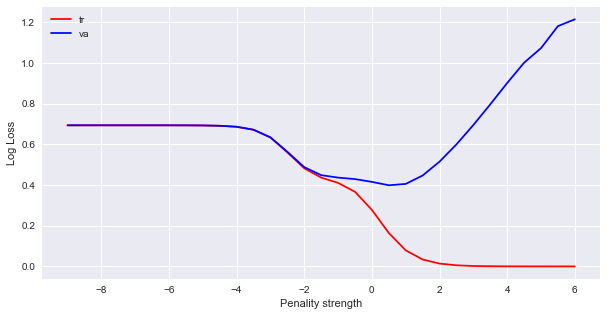

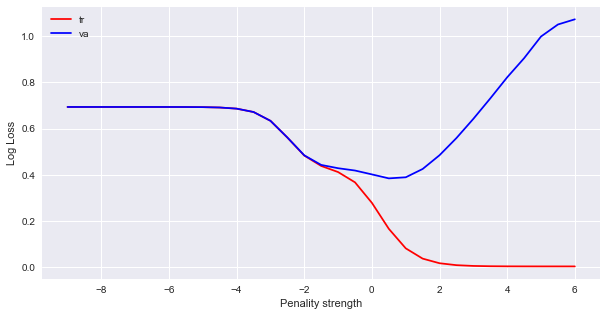

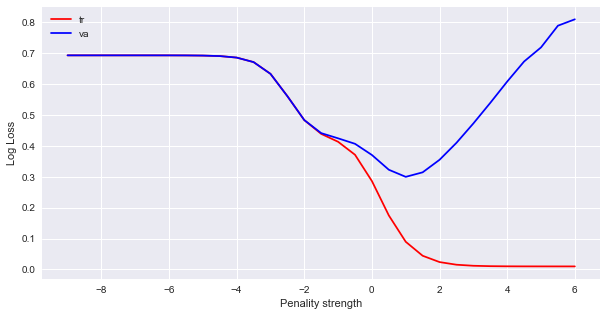

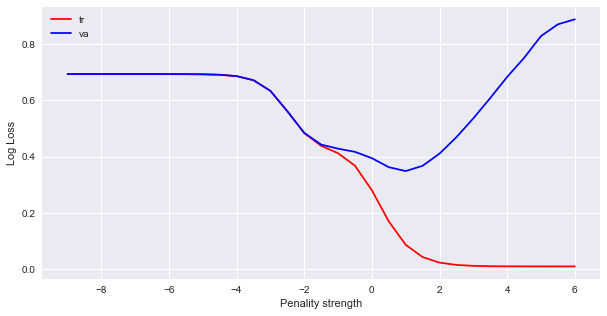

In [38]:
skf = StratifiedKFold(n_splits=4)
X = title_1hot
y = np.array(Y_label)
k = 1
for train_index, vali_index in skf.split(X,y):
    #print("Train:", train_index, "Validation:",vali_index)
    X_train, X_vali = X[train_index], X[vali_index]
    #print(np.shape(X_train))
    y_train, y_vali = y[train_index], y[vali_index]
    #print(np.shape(y_train))
    #print(np.shape(y_test))
    tr_loss_list = []
    va_loss_list = []
    C_grid =np.logspace(-9,6,31)
    for c in C_grid:
        logi_model = sklearn.linear_model.LogisticRegression(C = c, solver='liblinear',max_iter=400)
        logi_model.fit(X_train,y_train)
        y_tr_pre = logi_model.predict_proba(X_train)
        y_va_pre = logi_model.predict_proba(X_vali)
        tr_loss = sklearn.metrics.log_loss(y_train,y_tr_pre)
        va_loss = sklearn.metrics.log_loss(y_vali,y_va_pre)
        tr_loss_list.append(tr_loss)
        va_loss_list.append(va_loss)
        print('C:',c)
        print('tr_loss:',tr_loss)
        print('va_loss',va_loss)
        print('------------')
    print(k)
    print('-------------------------------------------')

    #plt.subplots_adjust(hspace=0.3, wspace=0.3)
    #plt.subplot(2,4,k)
    #plt.suptitle('Log loss')
    plt.figure(figsize=(10,5))
    k +=1
    l = np.log10(C_grid)
    plt.plot(l,tr_loss_list,color='red',label='tr')
    plt.plot(l,va_loss_list,color='blue',label='va')
    plt.xlabel('Penality strength')
    plt.ylabel('Log Loss')
    plt.legend()

No handles with labels found to put in legend.


(829,)

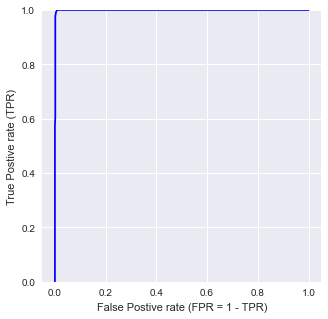

In [39]:
#Select C=10 and 100
logi_model = sklearn.linear_model.LogisticRegression(C = 10, solver='liblinear',max_iter=1000,tol = 1e-8,
                                                     class_weight='balanced')
logi_model.fit(X,y)
y_pre = logi_model.predict_proba(X)[:,1]

#make_plot_perf_vs_threshold(y, y_pre, bin_edges=np.linspace(0, 1, 21))

plt.figure(figsize=(5,5))
fpr,tpr,threshold = sklearn.metrics.roc_curve(y,y_pre)
plt.plot(fpr,tpr,color='blue',label='')
plt.ylim([0, 1]);
plt.xlabel("False Postive rate (FPR = 1 - TPR)");
plt.ylabel("True Postive rate (TPR)");
plt.legend()
np.shape(y_pre)

In [40]:
def calc_TP_TN_FP_FN(ytrue_N, yhat_N):

    TP = 0.0  #即 11
    TN = 0.0  #即 00
    FP = 0.0  #即 hat为1,truth为0
    FN = 0.0  #即 hat为0,truth为1
    
    for i in range(len(ytrue_N)):
        if ytrue_N[i] == 1 and yhat_N[i] == 1:
            TP +=1
        elif ytrue_N[i] == 0 and yhat_N[i] == 0:
            TN +=1
        elif ytrue_N[i] == 0 and yhat_N[i] == 1:
            FP +=1
        elif ytrue_N[i] == 1 and yhat_N[i] == 0:
            FN +=1

def calc_perf_metrics_for_threshold(ytrue_N, yproba1_N, thresh):
    ''' Compute performance metrics for a given probabilistic classifier and threshold
    '''
    tp, tn, fp, fn = calc_TP_TN_FP_FN(ytrue_N, yproba1_N >= thresh)
    ## Compute ACC, TPR, TNR, etc.
    acc = (tp + tn) / float(tp + tn + fp + fn + 1e-10)
    tpr = tp / float(tp + fn + 1e-10)
    tnr = tn / float(fp + tn + 1e-10)
    ppv = tp / float(tp + fp + 1e-10)
    npv = tn / float(tn + fn + 1e-10)
    
    return acc, tpr, tnr, ppv, npv

def print_perf_metrics_for_threshold(ytrue_N, yproba1_N, thresh):
    ''' Pretty print perf. metrics for a given probabilistic classifier and threshold
    '''
    acc, tpr, tnr, ppv, npv = calc_perf_metrics_for_threshold(ytrue_N, yproba1_N, thresh)
    
    ## Pretty print the results
    print("%.3f ACC" % acc)
    print("%.3f TPR" % tpr)
    print("%.3f TNR" % tnr)
    print("%.3f PPV" % ppv)
    print("%.3f NPV" % npv)

def calc_confusion_matrix_for_threshold(ytrue_N, yproba1_N, thresh):
    ''' Compute the confusion matrix for a given probabilistic classifier and threshold'''
    cm = sklearn.metrics.confusion_matrix(ytrue_N, yproba1_N >= thresh)
    cm_df = pd.DataFrame(data=cm, columns=[0, 1], index=[0, 1])
    cm_df.columns.name = 'Predicted'
    cm_df.index.name = 'True'
    return cm_df
def compute_perf_metrics_across_thresholds(ytrue_N, yproba1_N, thresh_grid=None):
    ''' Compute common binary classifier performance metrics across many thresholds
    '''
    if thresh_grid is None:
        bin_edges = np.linspace(0, 1.001, 21)
        thresh_grid = np.sort(np.hstack([bin_edges, np.unique(yproba1_N)]))
    tpr_grid = np.zeros_like(thresh_grid)
    tnr_grid = np.zeros_like(thresh_grid)
    ppv_grid = np.zeros_like(thresh_grid)
    npv_grid = np.zeros_like(thresh_grid)
    acc_grid = np.zeros_like(thresh_grid)
    for tt, thresh in enumerate(thresh_grid):
        # Apply specific threshold to convert probas into hard binary values (0 or 1)
        # Then count number of true positives, true negatives, etc.
        # Then compute metrics like accuracy and true positive rate
        acc, tpr, tnr, ppv, npv = calc_perf_metrics_for_threshold(ytrue_N, yproba1_N, thresh)
        acc_grid[tt] = acc
        tpr_grid[tt] = tpr
        tnr_grid[tt] = tnr
        ppv_grid[tt] = ppv
        npv_grid[tt] = npv
    return thresh_grid, dict(
        acc=acc_grid,
        tpr=tpr_grid,
        tnr=tnr_grid,
        ppv=ppv_grid,
        npv=npv_grid)

def make_plot_perf_vs_threshold(ytrue_N, yproba1_N, bin_edges=np.linspace(0, 1, 21)):
    ''' Make pretty plot of binary classifier performance as threshold increases
    
    Produces a plot with 3 rows:
    * top row: hist of predicted probabilities for negative examples (shaded red)
    * middle row: hist of predicted probabilities for positive examples (shaded blue)
    * bottom row: line plots of metrics that require hard decisions (ACC, TPR, TNR, etc.)
    '''
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 8))
    sns.distplot(
        yproba1_N[ytrue_N == 0],
        color='r', bins=bin_edges, kde=False, rug=True, ax=axes[0]);
    sns.distplot(
        yproba1_N[ytrue_N == 1],
        color='b', bins=bin_edges, kde=False, rug=True, ax=axes[1]);

    thresh_grid, perf_grid = compute_perf_metrics_across_thresholds(ytrue_N, yproba1_N)
    axes[2].plot(thresh_grid, perf_grid['acc'], 'k-', label='accuracy')
    axes[2].plot(thresh_grid, perf_grid['tpr'], 'b-', label='TPR (recall/sensitivity)')
    axes[2].plot(thresh_grid, perf_grid['tnr'], 'g-', label='TNR (specificity)')
    axes[2].plot(thresh_grid, perf_grid['ppv'], 'c-', label='PPV (precision)')
    axes[2].plot(thresh_grid, perf_grid['npv'], 'm-', label='NPV')
    
    axes[2].legend()
    axes[2].set_ylim([0, 1])

In [41]:
gender_predict = pd.read_csv('cleaned_profiles.csv')
gender_predict

,Name,Title,Company Name,Highest Degree,Date 1,Date 2,Location,Gender,Probability of Being Male
0,Yiwen Zhang,Data Scientist,"Aetna, a CVS Health Company Full-time",Master of Science - MS,Jan 2020 – Present,6 mos,"New York, New York",M,0.995648
1,Yiwen Zhang,Data Scientist,CVS Health Full-time,Master of Science - MS,Jan 2020 – Present,6 mos,"New York, New York",M,0.995648
2,Yiwen Zhang,Partner —Machine learning engineer(our product...,YouPlanets Part-time,Master of Science - MS,Dec 2019 – Present,7 mos,"New York, New York, United States",M,0.995648
3,Yiwen Zhang,Data Science Internship,"NBCUniversal Media, LLC",Master of Science - MS,Sep 2018 – Dec 2018,4 mos,"New York, New York",M,0.995648
4,Yiwen Zhang,Data Scientist(Capstone Project),Goldman Sachs,Master of Science - MS,Sep 2018 – Dec 2018,4 mos,Greater New York City Area,M,0.995648
...,...,...,...,...,...,...,...,...,...
2242,Yue Dong,Active Safety Validation Engineer,General Motors,Master’s Degree,May 2017 – Dec 2018,1 yr 8 mos,Michigan,M,0.994895
2243,Christopher Parker,Director of Advanced Manufacturing Engineering,Adient,BS,Oct 2016 – Present,3 yrs 9 mos,"Plymouth, MI",M,0.999347
2244,Christopher Parker,"Advanced Manufacturing Engineering Manager, No...",Johnson Controls Inc.,BS,Jan 2000 – Present,20 yrs 6 mos,"Plymouth, MI",M,0.999347
2245,Christopher Parker,Manufacturing Engineer,Ford Motor Company,BS,Jul 1990 – Jan 2000,9 yrs 7 mos,"Saline, Michigan",M,0.999347
